# DE Project

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the original data
The dataset consists of 3 csv files -
 * **goalscorers.csv**, which contains all the goals scores in international football history
 * **results.csv**, which contains all the matches since 1876
 * **shootouts.csv** which contains all the penalty shoot-outs.

In [14]:
goals = pd.read_csv('data/goalscorers.csv')
matches = pd.read_csv('data/results.csv')
penalties = pd.read_csv('data/shootouts.csv')

Let us have a quick look at the data.

In [15]:
goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
41003,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False
41004,2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True
41005,2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False
41006,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False


In [16]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


In [17]:
penalties

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand
...,...,...,...,...
542,2022-12-05,Japan,Croatia,Croatia
543,2022-12-06,Morocco,Spain,Morocco
544,2022-12-09,Croatia,Brazil,Croatia
545,2022-12-09,Netherlands,Argentina,Argentina


Looking at the first two tables, I feel one more table can be formed by merging the two, which can be quite useful because then we will have all the goals in every match segregated at a place, instead of two different tables for the same purpose.

However, merging operations might lead to increase the number of missing values even further if there already are missing values in the dataframes. So, we need to check for and treat missing values before merging.

In [18]:
matches.isna().sum()    #counts missing values for each column

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [19]:
penalties.isna().sum()

date         0
home_team    0
away_team    0
winner       0
dtype: int64

Thankfully, **matches** and **penalties** tables do not have any missing values.

In [20]:
goals.isna().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       258
own_goal       0
penalty        0
dtype: int64

In [21]:
temp = goals[['scorer', 'minute']]
temp[temp['scorer'].isna()]   #to check if both columns intersect at missing values

,scorer,minute
8012,NaN,NaN
8013,NaN,NaN
8014,NaN,NaN
8015,NaN,NaN
8016,NaN,NaN
8017,NaN,NaN
8018,NaN,NaN
8019,NaN,NaN
8020,NaN,NaN
8021,NaN,NaN


Clearly, the <i>scorer</i> and <i>minute</i> columns have missing values, whenever <i>scorer</i> is missing, <i>minute</i> also is missing.
For once, we can go ahead and remove the respective rows but, I would want to lose as little data as possible because the dataset is already pretty small (just above 40k observations).

So, here is what I decided to do -
* Remove the rows with missing <i>scorer</i>, since these form merely 0.1 % of the dataset and it is impractical to set a dummy scorer name(that makes no sense, right?)
* Keep the rows where we have a <i>scorer</i> but <i>minute</i> is missing. Missing <i>minute</i>s can then be replaced by the mode of the <i>minute</i>s, i.e. the minute in which most goals are usually scored. This will preserve information as well as accuracy.

In [22]:
goals = goals.dropna(subset='scorer')
goals['scorer'].isna().sum()    #counting total NaN values in scorer

TypeError: Index(...) must be called with a collection of some kind, 'scorer' was passed

In [23]:
mode_of_minute = int(goals['minute'].mode())
goals['minute'] = goals['minute'].fillna(mode_of_minute)
goals.isna().sum()

date          0
home_team     0
away_team     0
team          0
scorer       49
minute        0
own_goal      0
penalty       0
dtype: int64

So, we have got rid of all the null values in the dataset. Let us now merge matches and goals to create our new dataframe, <i>all_goals</i>

In [24]:
all_goals = matches.merge(right=goals, left_on=['date', 'home_team', 'away_team'], right_on=['date', 'home_team', 'away_team'], how='inner' )
all_goals

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41003,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Argentina,Ángel Di María,36.0,False,False
41004,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,France,Kylian Mbappé,80.0,False,True
41005,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,France,Kylian Mbappé,81.0,False,False
41006,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Argentina,Lionel Messi,109.0,False,False


Since, the goals data in the given dataset for the years from 1872 to 1916 is not available but the match data is, I have decided not to delete the matches table because it still has some extra data that is nowhere else and might be useful later on.

In [25]:
print('Shape of matches: {0}\nShape of goals: {1}\nShape of all_goals: {2}\nShape of penalties: {3}'.format(matches.shape, goals.shape, all_goals.shape, penalties.shape))

Shape of matches: (44557, 9)
Shape of goals: (41008, 8)
Shape of all_goals: (41008, 14)
Shape of penalties: (547, 4)


Clearly, the shapes are consistent and accurate. Let us begin exploratory analysis now, but before that let me just tweak around our <i>all_goals</i> dataframe to see if I can find something more interesting..

In [26]:
all_goals.describe()

,home_score,away_score,minute
count,41008.000000,41008.000000,41008.000000
mean,2.643362,1.587471,50.270703
std,2.462027,1.722926,26.467273
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,28.000000
50%,2.000000,1.000000,51.000000
75%,4.000000,2.000000,73.000000
max,31.000000,17.000000,122.000000


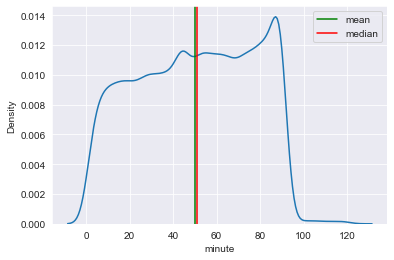

In [27]:
ax = sns.kdeplot(data=all_goals, x='minute')
ax.axvline(all_goals['minute'].mean(), color='g', label='mean')
ax.axvline(all_goals['minute'].median(), color='r', label='median')
ax.legend()

1. Most number of goals are scored in the 90th minute, which might look surprising at first, but it is not - stay tuned to see why.
2. The median and mean stick around 50, which simply makes sense according to basic laws of probability.

I also want to visualize the home and away score against minutes, but that would require a new column which signifies that a goal has been scored by home team or away team.

In [28]:
#this cell is for occasional saving purposes and is not intended for final submission

all_goals.to_pickle('created/all_goals.pkl')
goals.to_pickle('created/goals.pkl')
matches.to_pickle('created/matches.pkl')
penalties.to_pickle('created/penalties.pkl')
minute_v_goal.to_pickle('created/goal_grouped_by_minute.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'created/all_goals.pkl'

We have created two boolean columns, <i>home_goal</i> will have value 1 if the home team has scored that goal(remember that each row is a goal), otherwise 0. Similarly, reverse for the <i>away_goal</i> column

In [29]:
all_goals['home_goal'] = all_goals.apply(lambda row: 1 if row['home_team']==row['team'] else 0, axis=1)
all_goals['away_goal'] = all_goals.apply(lambda row: 1 if row['away_team']==row['team'] else 0, axis=1)
minute_v_goal = all_goals.loc[:, ['minute', 'home_team', 'away_team', 'home_goal', 'away_goal']]
minute_v_goal

,minute,home_team,away_team,home_goal,away_goal
0,44.0,Chile,Uruguay,0,1
1,55.0,Chile,Uruguay,0,1
2,70.0,Chile,Uruguay,0,1
3,75.0,Chile,Uruguay,0,1
4,2.0,Argentina,Chile,1,0
...,...,...,...,...,...
41003,36.0,Argentina,France,1,0
41004,80.0,Argentina,France,0,1
41005,81.0,Argentina,France,0,1
41006,109.0,Argentina,France,1,0


In the following cell, I have grouped <i>minute</i> against <i>home_goal</i> and <i>away_goal</i> so that I can construct a graph of minutes against total goals in that minute.

In [30]:
minute_v_goal = minute_v_goal.groupby('minute').sum(numeric_only=True)
minute_v_goal

,home_goal,away_goal
minute,,
1.0,116,72
2.0,206,117
3.0,186,110
4.0,208,116
5.0,201,164
...,...,...
117.0,5,2
118.0,7,2
119.0,6,2


<AxesSubplot:xlabel='minute', ylabel='home_goal'>

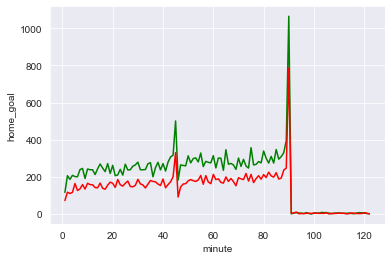

In [31]:
ax2 = sns.lineplot(data=minute_v_goal, x='minute', y='home_goal', color='g')
sns.lineplot(data=minute_v_goal, x='minute', y='away_goal', color='r', ax=ax2)

It is very surprising to see how similar the distribution of both of these curves is. Let us break down this curve:
 * The flat tail after 90 minutes is pretty much obvious, because very less number of games go into the extra time.
 * Most number of goals are scored at the end of both halves. This looks surprising at first but this onl makes sense because of **injury time**. Injury time might last for anywhere between 0 to 10 minutes or even longer, hence the 90th or the 45th minutes are effectively many times longer than a minute, hence more probability of scoring goals during those minutes.

Lastly, one last column to add before we move on to the interesting stuff - the weekday column.

In [32]:
all_goals['date'] = pd.to_datetime(all_goals['date'])
all_goals['weekday'] = all_goals['date'].dt.day_name()
all_goals[['date','weekday']]

,date,weekday
0,1916-07-02,Sunday
1,1916-07-02,Sunday
2,1916-07-02,Sunday
3,1916-07-02,Sunday
4,1916-07-06,Thursday
...,...,...
41003,2022-12-18,Sunday
41004,2022-12-18,Sunday
41005,2022-12-18,Sunday
41006,2022-12-18,Sunday


As you might argue, it would make more sense to create this column in the <i>matches</i> table instead of <i>all_goals</i>. But, I want to use only <i>all_goals</i> for all the further tasks and forget the <i>matches</i> table altogether. It has done its job ;)